In [6]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_69825/1709872816.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  square_out_rate, square_out = wavfile.read(square_out_path)


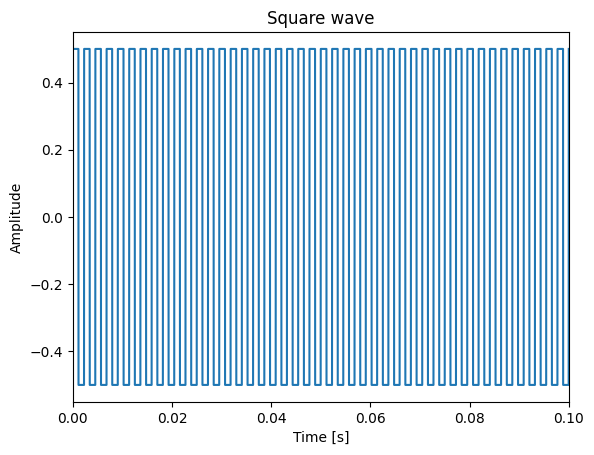

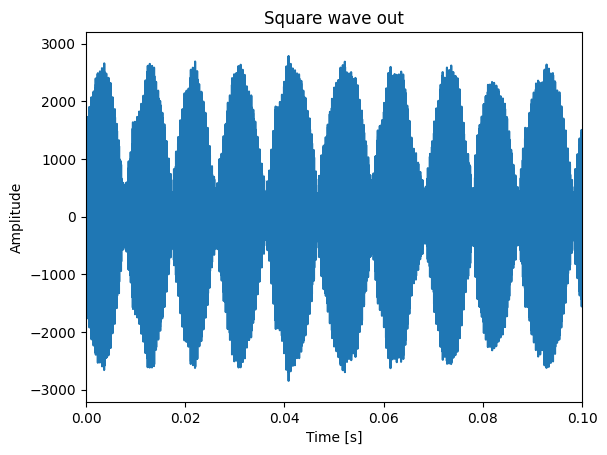

In [7]:
square_path = 'inputs/square_wave.wav'
square_out_path = 'square aup/square_out.wav'

square_rate, square = wavfile.read(square_path)
square_out_rate, square_out = wavfile.read(square_out_path)



#plot square
t = np.linspace(0, len(square)/square_rate, len(square))
plt.figure()
plt.plot(t,square)
plt.title('Square wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)
plt.show()

#plot square out
t = np.linspace(0, len(square_out)/square_out_rate, len(square_out))
plt.figure()
plt.plot(t,square_out)
plt.title('Square wave out')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(0, 0.1)
plt.show()






In [8]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):

    plt.figure(figsize=(8, 6))
    # dibujar magnitud
    plt.subplot(2, 1, 1)
    plt.plot(frequencies, 20 * np.log10(magnitude))
    plt.xscale('log')
    plt.xlim(20,20000)
    plt.title('Magnitude')
    plt.ylabel('Magnitude (dB)')
    plt.grid(which='both', axis='both')

    # dibujar fase
    plt.subplot(2, 1, 2)
    plt.plot(frequencies, np.degrees(phase))
    plt.xscale('log')
    plt.title('Phase')
    plt.xlabel('Frequency (Hz)')
    plt.xlim(20,20000)
    plt.ylabel('Phase (degrees)')
    plt.grid(which='both', axis='both')
    

    plt.tight_layout()

    plt.show()

/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_69825/2441431417.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(frequencies, 20 * np.log10(magnitude))


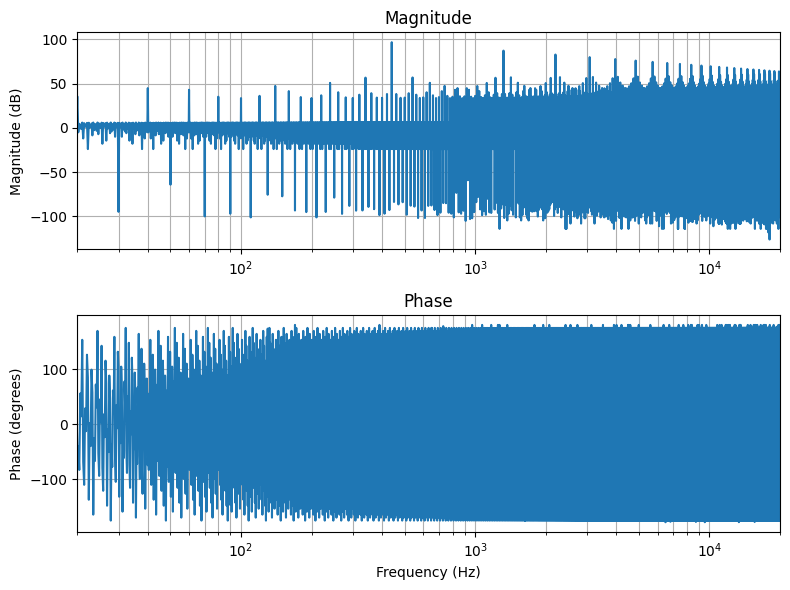

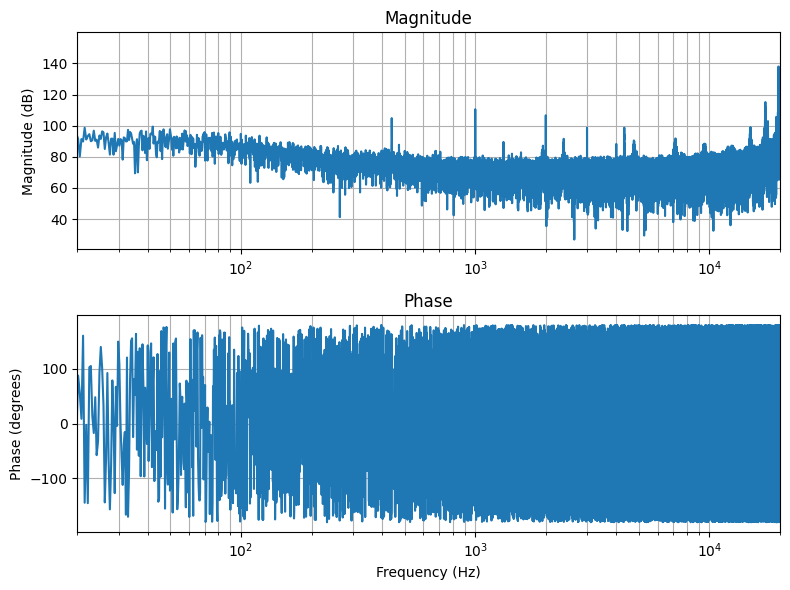

In [9]:
#plot bode square
frequencies, magnitude, phase = apply_fft(square, square_rate)
plot_bode(frequencies, magnitude, phase)

#plot bode square out
frequencies, magnitude, phase = apply_fft(square_out, square_out_rate)
plot_bode(frequencies, magnitude, phase)


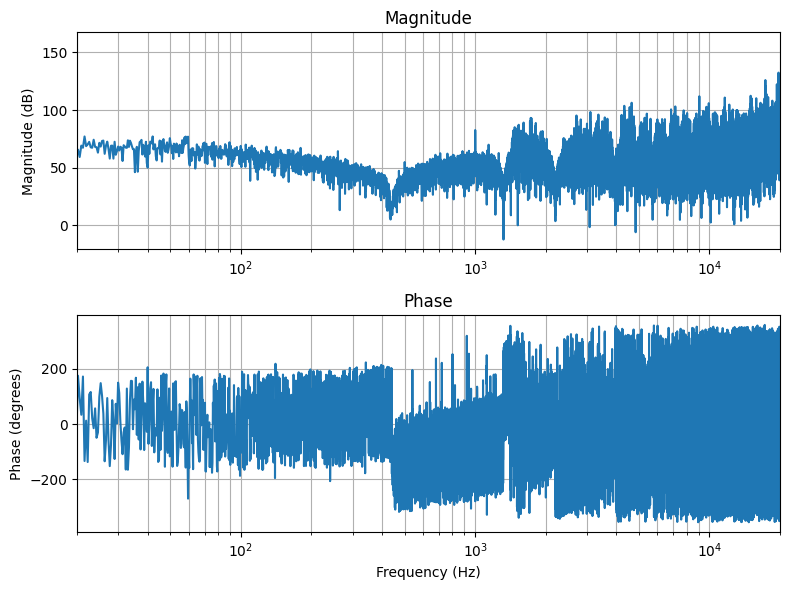

In [10]:
def compute_frequency_responce(square, square_out, sample_rate):
    # Perform FFT
    N = len(square)
    yf = fft(square)
    yf_out = fft(square_out)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf_out) / np.abs(yf)
    phase = np.angle(yf_out) - np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
if len(square) != len(square_out):
    if len(square) > len(square_out):
        square = square[:len(square_out)]
    else:
        square_out = square_out[:len(square)]
        
square_frequencies, square_magnitude, square_phase = compute_frequency_responce(square, square_out, square_rate)
plot_bode(square_frequencies, square_magnitude, square_phase)